In [1]:
#import all required library 

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,f1_score,accuracy_score,precision_score,confusion_matrix

In [3]:
df=pd.read_csv("diabetes (3).csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.corr

<bound method DataFrame.corr of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [8]:
df.duplicated().sum()

0

In [9]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [16]:
#extracting feature array and Target columns
X=df.drop(columns=['Outcome','Pregnancies'])
y=df['Outcome']

In [17]:
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


In [18]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [20]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25, random_state=42)

In [21]:
print("Length of X: ", len(X))
print("Length of X_train: ", len(X_train))
print("Length of X: ", len(X_test))

Length of X:  768
Length of X_train:  576
Length of X:  192


In [22]:
model_SVC = SVC(kernel='linear', random_state = 1)

# Training model
model_SVC.fit(X_train, y_train)
model_SVC

SVC(kernel='linear', random_state=1)

In [24]:
y_pred = model_SVC.predict(X_test)
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [27]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[101,  22],
       [ 26,  43]], dtype=int64)

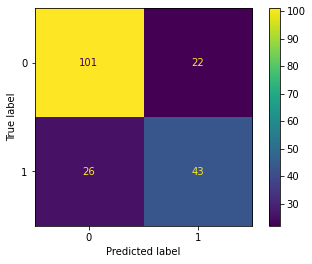

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_SVC.classes_).plot()

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       123
           1       0.66      0.62      0.64        69

    accuracy                           0.75       192
   macro avg       0.73      0.72      0.72       192
weighted avg       0.75      0.75      0.75       192



In [31]:
print("accuracy_score:",accuracy_score(y_test,y_pred))
print("precision_score:",precision_score(y_test,y_pred))
print("recall_score:",accuracy_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy_score: 0.75
precision_score: 0.6615384615384615
recall_score: 0.75
f1_score: 0.6417910447761194
